In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from sklearn.datasets import make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import fetch_20newsgroups

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

from sklearn.metrics import confusion_matrix

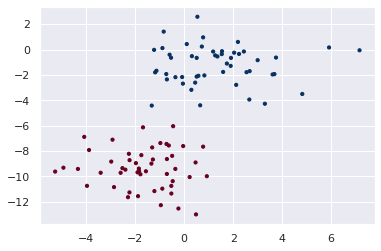

In [ ]:
from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='RdBu');

In [ ]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
rng = np.random.RandomState(0)
Xnew = [-6,-14]+[14,18]* rng.rand(2000,2)
ynew = model.predict(Xnew)

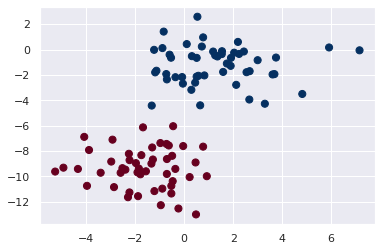

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y , s=50, cmap='RdBu'   )
lim=plt.axis()


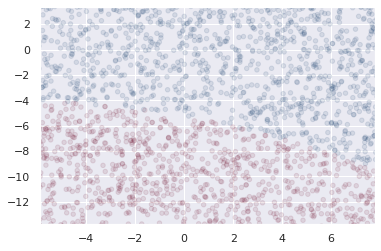

In [ ]:
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [ ]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [ ]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:

categories = ['talk.religion.misc', 'sci.space', 'comp.graphics']
train =fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)
print(train.data[5])

From: "danny hawrysio" <danny.hawrysio@canrem.com>
Subject: radiosity
Reply-To: "danny hawrysio" <danny.hawrysio@canrem.com>
Organization: Canada Remote Systems
Distribution: comp
Lines: 9


-> I am looking for source-code for the radiosity-method.

 I don't know what kind of machine you want it for, but the program
Radiance comes with 'C' source code - I don't have ftp access so I
couldn't tell you where to get it via that way.
--
Canada Remote Systems - Toronto, Ontario
416-629-7000/629-7044



In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

In [ ]:
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [ ]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

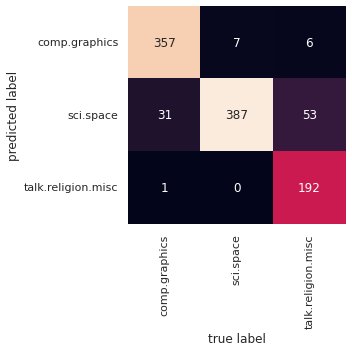

In [ ]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T , square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

#this is hit map

In [ ]:
def predict_category(s, train=train, model=model):
  pred = model.predict([s])
  return train.target_names[pred[0]]

In [ ]:
predict_category('sending a payload to the ISS')
predict_category('discussing islam vs atheism')
predict_category('determining the screen resolution')

'comp.graphics'

In [ ]:
predict_category('computer')

'comp.graphics'

In [ ]:
predict_category('graphics')

'comp.graphics'